

# Project: Investigate a Dataset ( No-Show Medical Appointments )


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

>   ####   cheduledDay: tells us on what day the patient set up their appointment.
>   ####  Neighborhood: indicates the location of the hospital.
>   ####  Scholarship : indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
>   ####  no-show     : says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
  

# The Questions:
> #### What is the mean patients age of shows /no-shows?
> #### What is the gender distribution for show / no-show patients?
> #### What is the gender distribution for sms received / no received patients?
> #### Which disease diabetes, hypertension, alcoholism, handicap patients show most in at appointment?
> #### which neighborhoods have the highest number of shows / no-shows?
> #### What is the ratio of appointment shows vs. no shows?

<a id='wrangling'></a>
## Data Wrangling

>   load in the data, check for cleanliness, trim and clean your dataset for analysis. 

### General Properties

In [961]:
#importing packages
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [962]:
# Load data to a dataframe
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [963]:
# size of the dataset 
df.shape 

(110527, 14)

> #### Dataset includes 110527 rows and 14 colomns

In [964]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [965]:
# Check if there is any missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> #### There are no null values in this dataset

In [966]:
df.duplicated().sum() # Check for duplicate rows 

0

> #### There are no duplicate rows

In [967]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### The Age column shows a minimum age of -1, which is error.

In [968]:
df['Age'].unique() #Age

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)



### Data Cleaning 

In [969]:
#renaming columns
#Fixing typos in data columns
new_labels = ['patientID', 'appointmentID', 'gender', 'schedule_day', 'appointment_day',
              'age', 'neighborhood', 'scholarship', 'hypertension',
              'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
df.columns = new_labels

In [970]:
df.head()

,patientID,appointmentID,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Removing age outliers

In [971]:
#Removing Age outliers from the data frame 
df = df[(df['age'] >= 0) & (df['age'] <= 100)]
df.shape

(110519, 14)

### convert patientID from float to int

In [972]:
#convert patientID from float to int
df['patientID'] = df['patientID'].astype('int64')

### Converting scheduled day and appointment day to datetime

In [973]:
#Convert into Date
df['schedule_day'] =pd.to_datetime(df['schedule_day']).dt.date
df['appointment_day'] =pd.to_datetime(df['appointment_day']).dt.date

### convert no show data to 0 and 1 instead of No' and Yes' 

In [974]:
#0 = Showed up to appointment
#1 = did not show up to appointment 
df.no_show.replace('No',0 ,inplace=True)   #replace no --> 0 
df.no_show.replace('Yes',1 ,inplace=True)   #replace yes --> 1

### create new column to store time between schedule and appointment

In [975]:
#create new column to store time between schedule and appointment
df['waiting_time_days'] =(df['appointment_day'] - df['schedule_day']).dt.days

In [976]:
df.tail()#returns the last few row

,patientID,appointmentID,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time_days
110522,2572134369293,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,0,35
110523,3596266328735,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,0,35
110524,15576631729893,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,0,41
110525,92134931435557,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,0,41
110526,377511518121127,5629448,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,0,41


In [977]:
df = df[(df.waiting_time_days >= 0)]
df.shape

(110514, 15)

<a id='eda'></a>
## Exploratory Data Analysis




In [978]:
df.gender.value_counts()  #Calculating number gender patients 

F    71829
M    38685
Name: gender, dtype: int64

In [979]:
df.no_show.value_counts() #Calculating number no_show and show patients 

0    88203
1    22311
Name: no_show, dtype: int64

In [980]:
# patient is experiencing Hypertension or not
p_h=df.hypertension.value_counts() #Calculating number no-hypertension and hypertension
p_h.head()

0    88714
1    21800
Name: hypertension, dtype: int64

In [981]:
p_hyper=np.round(p_h/df.shape[0]*100,2) #calculating percentage hypertension
p_hyper

0    80.27
1    19.73
Name: hypertension, dtype: float64

In [982]:
#patient is experiencing Diabetes or not
p_d=df.diabetes.value_counts()  # Calculating number no-diabetes and diabetes patients 
p_d

0    102571
1      7943
Name: diabetes, dtype: int64

In [983]:
p_diab=np.round(p_d/df.shape[0]*100,2) #calculating percentage diabetes
p_diab

0    92.81
1     7.19
Name: diabetes, dtype: float64

In [984]:
#patient is experiencing Alcoholism or not 
p_alco=df.alcoholism.value_counts() #Calculatin number alcoholism and no alcoholism patients 
p_alco

0    107154
1      3360
Name: alcoholism, dtype: int64

In [985]:
p_alcoh=np.round(p_alco/df.shape[0]*100,2) #calculating percentage alcoholism
p_alcoh

0    96.96
1     3.04
Name: alcoholism, dtype: float64

In [986]:
#patient is with special needs or not#
p_h =df.handicap.value_counts()  #Calculating number no handicap and handicap1,handicap2,handicap3 ,handicap4 patients
p_h

0    108279
1      2036
2       183
3        13
4         3
Name: handicap, dtype: int64

In [987]:
p_handic=np.round(p_h/df.shape[0]*100,2) #calculating percentage handicap
p_handic

0    97.98
1     1.84
2     0.17
3     0.01
4     0.00
Name: handicap, dtype: float64

In [988]:
p_s=df.sms_received.value_counts() #Calculatin number sms_received and no_sms_received patients 
p_s.head()

0    75033
1    35481
Name: sms_received, dtype: int64

In [989]:
p_sms=np.round(p_s/df.shape[0]*100,2) #calculating percentage sms_received
p_sms

0    67.89
1    32.11
Name: sms_received, dtype: float64

###   What is the mean patients age of shows /no-shows?

In [990]:
n_sho = df.no_show==True
shows=df.age[n_sho].mean()
print("Mean Age of patients show-up :" ,shows)

Mean Age of patients show-up : 34.3070234413518


In [991]:
y_sho = df.no_show==False
noshow=df.age[y_sho].mean()
print("Mean Age of patients no show-up :" ,noshow)

Mean Age of patients no show-up : 37.78729748421256


### What is the gender distribution for show / no-show patients?


In [992]:
d_gender = df.groupby('gender').no_show.value_counts()
d_gender

gender  no_show
F       0          57241
        1          14588
M       0          30962
        1           7723
Name: no_show, dtype: int64

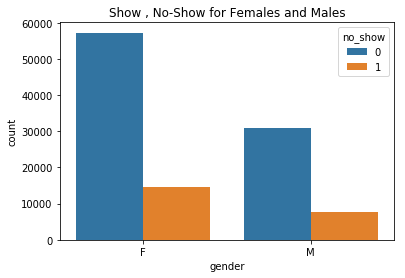

In [993]:
ax = sns.countplot(x=df.gender, hue=df.no_show, data=df )
ax.set_title("Show , No-Show for Females and Males")
x_ticks_labels=['F', 'M']
plt.show();

> #### A bar chart shows the relation between gender and show/no-show . As compare to male, female are more concern about health and they have more number of appointment date.

### What is the gender distribution for sms received / no received  patients?

In [994]:
#### Calculating number the females and mans who received SMS or not 
d_sms=df.groupby('gender').sms_received.value_counts()
d_sms

gender  sms_received
F       0               47628
        1               24201
M       0               27405
        1               11280
Name: sms_received, dtype: int64

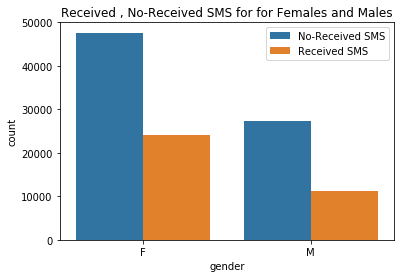

In [995]:
ax = sns.countplot(x=df.gender , hue=df.sms_received, data=df)
ax.set_title("Received , No-Received SMS for for Females and Males")
x_ticks_labels=['F', 'M']
plt.legend(labels = ['No-Received SMS', 'Received SMS'])
plt.show();

> #### The above chart data shows that having received SMS actually increases when the no-show  .

## Which disease Diabetes, Hypertension, Alcoholism, Handicap patients show most in at appointment?

In [996]:
d_hypertension = df.groupby('hypertension').no_show.value_counts()
d_hypertension

hypertension  no_show
0             0          70175
              1          18539
1             0          18028
              1           3772
Name: no_show, dtype: int64

In [997]:
d_diabetes = df.groupby('diabetes').no_show.value_counts()
d_diabetes

diabetes  no_show
0         0          81690
          1          20881
1         0           6513
          1           1430
Name: no_show, dtype: int64

In [998]:
d_alcoholism = df.groupby('alcoholism').no_show.value_counts()
d_alcoholism

alcoholism  no_show
0           0          85520
            1          21634
1           0           2683
            1            677
Name: no_show, dtype: int64

In [999]:
d_handicap = df.groupby('handicap').no_show.value_counts()
d_handicap

handicap  no_show
0         0          86370
          1          21909
1         0           1675
          1            361
2         0            146
          1             37
3         0             10
          1              3
4         0              2
          1              1
Name: no_show, dtype: int64

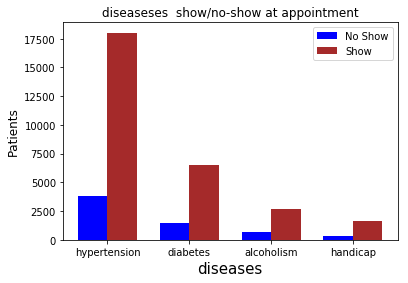

In [1000]:
y_shows = df.query('no_show == "0"')
n_shows = df.query('no_show == "1"')

y_shws = [y_shows.query('hypertension == 1').count()[0], y_shows.query('diabetes == 1').count()[0],
          y_shows.query('alcoholism == 1').count()[0],  y_shows.query('handicap == 1').count()[0]]

n_shws = [n_shows.query('hypertension == 1').count()[0], n_shows.query('diabetes == 1').count()[0], 
          n_shows.query('alcoholism == 1').count()[0], df_show.query('handicap == 1').count()[0]]

ticks = ['hypertension', 'diabetes', 'alcoholism', 'handicap']
N=4
x = np.arange(N)
width = 0.36
fig, ax = plt.subplots()
rect1 = ax.bar(x, y_noshow, width, color='Blue')
rect2 = ax.bar(x + width, y_show, width, color='brown')
ax.set_title('diseaseses  show/no-show at appointment', fontsize=12)
ax.set_ylabel('Patients', fontsize=12)
ax.set_xticks(x + width / 2)
ax.set_xticklabels(ticks)
ax.set_xlabel('diseases', fontsize=15)
ax.legend((rect1[0], rect2[0]), ('No Show','Show'));

> #### Patients with hipertension appear most at the appointment.

In [1001]:
d_appointment_day = df.groupby(["appointment_day","no_show"])["no_show"].count().reset_index(name="appointment count")
d_appointment_day.head() #calculate number of no show /show in the day of the appointment
# show->0
#not show ->1

,appointment_day,no_show,appointment count
0,2016-04-29,0,2602
1,2016-04-29,1,633
2,2016-05-02,0,3515
3,2016-05-02,1,861
4,2016-05-03,0,3424


In [1002]:
print('Visit schedule started on: {}.' .format(df['schedule_day'].min()))  
print('Visit schedule ended on: {}.' .format(df['schedule_day'].max()))

Visit schedule started on: 2015-11-10.
Visit schedule ended on: 2016-06-08.


In [1003]:
print('Visit appointments started on: {}.'.format(df['appointment_day'].min()))
print('Visit appointments ended on: {}.'.format(df['appointment_day'].max()))

Visit appointments started on: 2016-04-29.
Visit appointments ended on: 2016-06-08.


In [1004]:
print('waiting time days mean  :{}' .format(df['waiting_time_days'].mean()))

waiting time days mean  :10.1844381707295


### which neighborhoods have the highest number of shows / no-shows?

####   Neighborhood vs  Show

In [1005]:
y_shows = df.query('no_show == "0"')
df_neighbor =y_shows.groupby("neighborhood")["no_show"].count().reset_index(name="count")
df_neighbor.head()

,neighborhood,count
0,AEROPORTO,7
1,ANDORINHAS,1740
2,ANTÔNIO HONÓRIO,221
3,ARIOVALDO FAVALESSA,220
4,BARRO VERMELHO,332


#### Neighborhood vs No Show

In [1006]:
no_shows = df.query('no_show == "1"')
df_neighbor = no_shows.groupby("neighborhood")["no_show"].count().reset_index(name="count")
df_neighbor.head()

,neighborhood,count
0,AEROPORTO,1
1,ANDORINHAS,518
2,ANTÔNIO HONÓRIO,50
3,ARIOVALDO FAVALESSA,62
4,BARRO VERMELHO,91


### What is the ratio of appointment shows vs. no shows?

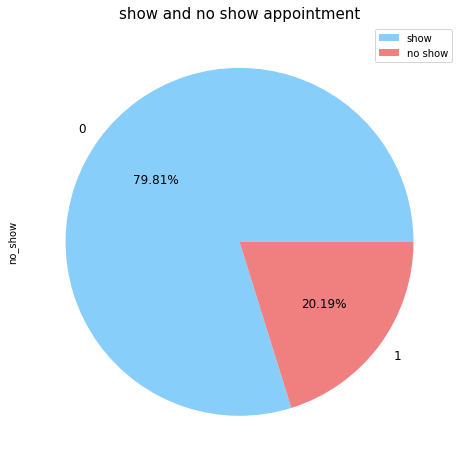

In [1007]:
df_pie = df['no_show'].value_counts()
ax = df_pie.plot.pie(figsize=(8,8),colors=['lightskyblue', 'lightcoral'], autopct='%1.2f%%', fontsize = 12);
ax.set_title('show and no show appointment' , fontsize = 15);
np.round(df_pie/df.shape[0]*100,2)
plt.legend(labels = ['show', 'no show'])
plt.show()

> #### the show-up appointment rate is 79.81%.

### scholarship

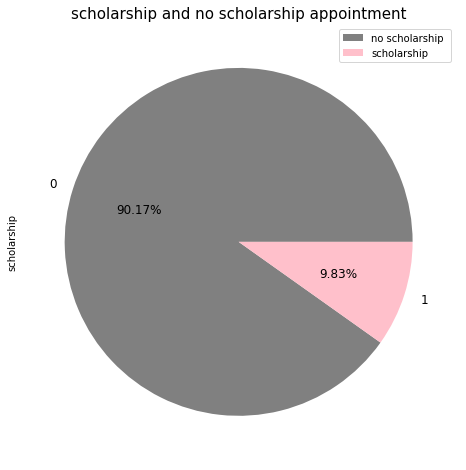

In [1008]:
#it was the patient is enrolled in Brasilian welfare program Bolsa Família or not
df_pie = df['scholarship'].value_counts()
ax = df_pie.plot.pie(figsize=(8,8),colors=['gray', 'pink'], autopct='%1.2f%%', fontsize = 12);
ax.set_title('scholarship and no scholarship appointment', fontsize = 15);
np.round(df_pie/df.shape[0]*100,2)
plt.legend(labels = ['no scholarship ', 'scholarship'])
plt.show()

> #### Looking at the pie chart above ,the appointment ratio where patients don't have a scholarship is 90.17% ,  where the ratio of appointments where patients have been granted a scholarship is 9.83%.


<a id='conclusions'></a>
## Conclusions

### Here are the conclusions that can be made from the analysis:

> #### The patients are 37 years on average. 25% of patients are below 18 and most of them are below 55.
> #### From the gender graph, it can be seen that number of female patients are greater than male patients.
> #### sum Number of patients showed-up appointment 88203  and no showed-up appointment 22311 .
> #### 19.73% of patients who experiance hypertension.
> #### 7.19% of patients who experiance diabetes.
> #### 3.04% of patients who experiance alcoholism.
> #### 1.84% of the patients experiance handicap1  , 0.17% experiance handicap 2, and 0.01% experiance handicap 3
> #### rate of patients who received an SMS reminder is 67.89%
> #### rate of patients who didn't receive an SMS reminder is 32.11%
> #### Visit schedule started on: 2015-11-10 and ended on: 2016-06-08
> #### Visit appointments started on: 2016-04-29 and ended on: 2016-06-08.
> #### waiting time days mean  :10.1844381707295
> #### The ANDORINHAS neighborhood registered a large number of patients who missed their appointments  





## Limitations:
> #### There were outliers spotted for Age, where the min Age was -1 and the max 115.
> #### handcap should be 0 or 1, but the max is 4. 
> #### For schedule_day column, has data only for 7 months of the year,  This doesn't represent data all year.